In [275]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Basic Information About Data

This dataset is from the 2019 Forbes Magazine US University Ranks and includes information about the top universities in the US.

In [276]:
df = pd.read_csv('/Users/eddysul/Desktop/Datasets/US Colleges Info/ForbesAmericasTopColleges2019.csv')

In [277]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Rank                      650 non-null    float64
 1   Name                      650 non-null    object 
 2   City                      647 non-null    object 
 3   State                     650 non-null    object 
 4   Public/Private            650 non-null    object 
 5   Undergraduate Population  650 non-null    float64
 6   Student Population        650 non-null    float64
 7   Net Price                 648 non-null    float64
 8   Average Grant Aid         646 non-null    float64
 9   Total Annual Cost         650 non-null    float64
 10  Alumni Salary             635 non-null    float64
 11  Acceptance Rate           648 non-null    float64
 12  SAT Lower                 551 non-null    float64
 13  SAT Upper                 551 non-null    float64
 14  ACT Lower 

In [278]:
df.head()

,Rank,Name,City,State,Public/Private,Undergraduate Population,Student Population,Net Price,Average Grant Aid,Total Annual Cost,Alumni Salary,Acceptance Rate,SAT Lower,SAT Upper,ACT Lower,ACT Upper,Website
0,1.0,Harvard University,Cambridge,MA,Private,13844.0,31120.0,14327.0,49870.0,69600.0,146800.0,5.0,1460.0,1590.0,32.0,35.0,www.harvard.edu
1,2.0,Stanford University,Stanford,CA,Private,8402.0,17534.0,13261.0,50134.0,69109.0,145200.0,5.0,1390.0,1540.0,32.0,35.0,www.stanford.edu
2,3.0,Yale University,New Haven,CT,Private,6483.0,12974.0,18627.0,50897.0,71290.0,138300.0,7.0,1460.0,1580.0,32.0,35.0,www.yale.edu
3,4.0,Massachusetts Institute of Technology,Cambridge,MA,Private,4680.0,11466.0,20771.0,43248.0,67430.0,155200.0,7.0,1490.0,1570.0,33.0,35.0,web.mit.edu
4,5.0,Princeton University,Princeton,NJ,Private,5659.0,8273.0,9327.0,48088.0,66150.0,139400.0,6.0,1430.0,1570.0,31.0,35.0,www.princeton.edu


# Data Cleaning

In [279]:
df.isnull().sum()

Rank                         0
Name                         0
City                         3
State                        0
Public/Private               0
Undergraduate Population     0
Student Population           0
Net Price                    2
Average Grant Aid            4
Total Annual Cost            0
Alumni Salary               15
Acceptance Rate              2
SAT Lower                   99
SAT Upper                   99
ACT Lower                   97
ACT Upper                   97
Website                      5
dtype: int64

In [280]:
college = df.drop(['SAT Lower','SAT Upper','ACT Lower','ACT Upper','Website'],axis=1)
college

,Rank,Name,City,State,Public/Private,Undergraduate Population,Student Population,Net Price,Average Grant Aid,Total Annual Cost,Alumni Salary,Acceptance Rate
0,1.0,Harvard University,Cambridge,MA,Private,13844.0,31120.0,14327.0,49870.0,69600.0,146800.0,5.0
1,2.0,Stanford University,Stanford,CA,Private,8402.0,17534.0,13261.0,50134.0,69109.0,145200.0,5.0
2,3.0,Yale University,New Haven,CT,Private,6483.0,12974.0,18627.0,50897.0,71290.0,138300.0,7.0
3,4.0,Massachusetts Institute of Technology,Cambridge,MA,Private,4680.0,11466.0,20771.0,43248.0,67430.0,155200.0,7.0
4,5.0,Princeton University,Princeton,NJ,Private,5659.0,8273.0,9327.0,48088.0,66150.0,139400.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
645,646.0,New Mexico State University,Las Cruces,NM,Public,13379.0,14432.0,8625.0,9582.0,34720.0,96700.0,64.0
646,647.0,Indiana State University,Terre Haute,IN,Public,13626.0,13763.0,13012.0,9297.0,32938.0,85600.0,85.0
647,648.0,Emory &amp; Henry College,Emory,VA,Private,1094.0,1226.0,19340.0,27155.0,48100.0,70700.0,72.0
648,649.0,Wells College,Aurora,NY,Private,488.0,516.0,22828.0,30207.0,55180.0,NaN,80.0


In [281]:
college.isnull().sum()

Rank                         0
Name                         0
City                         3
State                        0
Public/Private               0
Undergraduate Population     0
Student Population           0
Net Price                    2
Average Grant Aid            4
Total Annual Cost            0
Alumni Salary               15
Acceptance Rate              2
dtype: int64

Getting the top 100 Colleges out of the list to compare with the whole data

In [282]:
top_college = college[:100]
top_college

,Rank,Name,City,State,Public/Private,Undergraduate Population,Student Population,Net Price,Average Grant Aid,Total Annual Cost,Alumni Salary,Acceptance Rate
0,1.0,Harvard University,Cambridge,MA,Private,13844.0,31120.0,14327.0,49870.0,69600.0,146800.0,5.0
1,2.0,Stanford University,Stanford,CA,Private,8402.0,17534.0,13261.0,50134.0,69109.0,145200.0,5.0
2,3.0,Yale University,New Haven,CT,Private,6483.0,12974.0,18627.0,50897.0,71290.0,138300.0,7.0
3,4.0,Massachusetts Institute of Technology,Cambridge,MA,Private,4680.0,11466.0,20771.0,43248.0,67430.0,155200.0,7.0
4,5.0,Princeton University,Princeton,NJ,Private,5659.0,8273.0,9327.0,48088.0,66150.0,139400.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96.0,Brandeis University,Waltham,MA,Private,3869.0,5721.0,31138.0,35487.0,70943.0,113200.0,34.0
96,97.0,Yeshiva University,New York,NY,Private,2884.0,6330.0,36306.0,26972.0,60525.0,112800.0,63.0
97,98.0,"University of Minnesota, Twin Cities",Minneapolis,MN,Public,45796.0,51848.0,17396.0,8760.0,39655.0,104000.0,50.0
98,99.0,University of Georgia,Athens,GA,Public,30690.0,37606.0,14625.0,10076.0,44978.0,100700.0,54.0


# Analysis of General Data

For this dataset we are going to analyze the relationships between different variables of data and compare the results of the whole dataset to the results of the dataset of top 100 colleges.

In [283]:
college.corr()

,Rank,Undergraduate Population,Student Population,Net Price,Average Grant Aid,Total Annual Cost,Alumni Salary,Acceptance Rate
Rank,1.000000,-0.060859,-0.133249,-0.329445,-0.445638,-0.552349,-0.721772,0.628110
Undergraduate Population,-0.060859,1.000000,0.977504,-0.421586,-0.534964,-0.347878,0.032952,0.050791
Student Population,-0.133249,0.977504,1.000000,-0.366417,-0.455760,-0.267689,0.107621,-0.023240
Net Price,-0.329445,-0.421586,-0.366417,1.000000,0.500836,0.717578,0.191580,-0.128402
Average Grant Aid,-0.445638,-0.534964,-0.455760,0.500836,1.000000,0.851840,0.377548,-0.557316
Total Annual Cost,-0.552349,-0.347878,-0.267689,0.717578,0.851840,1.000000,0.398787,-0.436688
Alumni Salary,-0.721772,0.032952,0.107621,0.191580,0.377548,0.398787,1.000000,-0.556903
Acceptance Rate,0.628110,0.050791,-0.023240,-0.128402,-0.557316,-0.436688,-0.556903,1.000000


<AxesSubplot:>

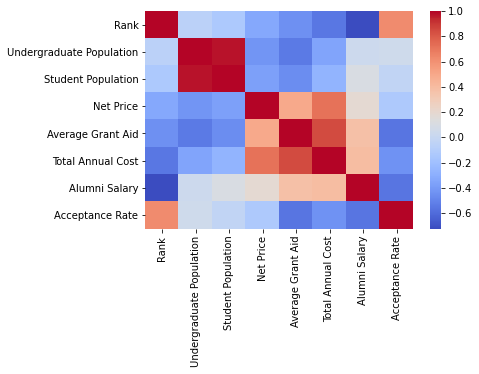

In [284]:
sns.heatmap(college.corr(),cmap='coolwarm')

In [285]:
top_college.corr()

,Rank,Undergraduate Population,Student Population,Net Price,Average Grant Aid,Total Annual Cost,Alumni Salary,Acceptance Rate
Rank,1.000000,0.195249,0.059194,0.163434,-0.583239,-0.172830,-0.544977,0.800066
Undergraduate Population,0.195249,1.000000,0.955425,-0.307860,-0.695763,-0.232008,-0.162951,0.413853
Student Population,0.059194,0.955425,1.000000,-0.234315,-0.586193,-0.134846,-0.094441,0.299827
Net Price,0.163434,-0.307860,-0.234315,1.000000,0.303930,0.696465,-0.178563,0.188673
Average Grant Aid,-0.583239,-0.695763,-0.586193,0.303930,1.000000,0.777242,0.208577,-0.718752
Total Annual Cost,-0.172830,-0.232008,-0.134846,0.696465,0.777242,1.000000,-0.164593,-0.137161
Alumni Salary,-0.544977,-0.162951,-0.094441,-0.178563,0.208577,-0.164593,1.000000,-0.421346
Acceptance Rate,0.800066,0.413853,0.299827,0.188673,-0.718752,-0.137161,-0.421346,1.000000


In [ ]:
sns.heatmap(top_college.corr(),cmap='coolwarm')

<AxesSubplot:>

In [ ]:
sns.pairplot(data=college,hue='Public/Private')

In [ ]:
sns.pairplot(data=top_college,hue='Public/Private')

The distribution and correlation between data seems to be similar for both datasets when looking at the whole general data. Now let's examine the data more thoroughly by looking at individual variables.

# Analysis of Individual Variables

As we analyze individual variables within the data, we will also see how the results differ among public and private schools.

### Distribution of Colleges Among State

In [ ]:
college['State'].value_counts().plot.pie(figsize=(15,8))

In [ ]:
plt.figure(figsize=(10,20), dpi=100)
plt.yticks(rotation=45,ha='right')
sns.countplot(y='State',data=df, order=df['State'].value_counts().index)

We can identify that New York is the state with the most colleges in the Forbes List, with California and Pennsylvania following it. We have Wyoming and West Virginia with the fewest colleges in the list.

In [ ]:
top_college = college[:100]

In [ ]:
top_college['State'].value_counts().plot.pie(figsize=(15,8))

In [ ]:
plt.figure(figsize=(5,10), dpi=100)
plt.yticks(rotation=45,ha='right')
sns.countplot(y='State',data=top_college, order=top_college['State'].value_counts().index)

Unlike the prior dataset, in the top 100 colleges, California has the most universities within the top 100, with Massachusetts coming in second, while New York fell to third place. Also, we can identify that states such as New Jersey and Missouri fell to the bottom of the list, when they were towards the middle of the distribution in the prior dataset.

### Relationship between Rank and Student Population

In [ ]:
sns.barplot(x='Public/Private', y='Student Population', data=college)

In [ ]:
sns.barplot(x='Public/Private', y='Student Population', data=top_college)

In both distributions, we can see that generally Public schools have a higher student population than private schools.

In [ ]:
sns.lmplot(x='Rank', y='Student Population', data=college, hue='Public/Private')

We can see there is a negative association between the variables, as the higher the rank, the lower the student population. 

In [ ]:
sns.lmplot(x='Rank', y='Student Population', data=top_college, hue='Public/Private')

Unlike the prior dataset, the data for public schools seem to have a positive association. However, this association may not be reliable because there are many outliers and the distribution is more scattered than the prior dataset.

### Relationship Between Rank and Acceptance Rate

In [ ]:
sns.lmplot(x='Rank', y='Acceptance Rate', data=college, hue='Public/Private')

We can see that in general for both Public and Private Schools the higher the rank, the higher the acceptance rate.

In [ ]:
sns.lmplot(x='Rank', y='Acceptance Rate', data=top_college, hue='Public/Private')

For the top 100 schools, there is a similar relationship between Rank and Acceptacnce Rate as the prior dataset.

### Relationship Between Rank and Total Annual Cost

In [ ]:
sns.barplot(x='Public/Private', y='Total Annual Cost', data=college)

In [ ]:
sns.barplot(x='Public/Private', y='Total Annual Cost', data=top_college)

We can see that for both datsets, private schools generally have a greater Total Annual Cost, while colleges in the top 100 tend to have a slightly greater average Total Annual Cost for both private and public schools.

In [ ]:
sns.lmplot(x='Rank', y='Total Annual Cost', data=college, hue='Public/Private')

We can see that there is a negative association between Rank and Total Annual Cost as the higher the rank, the lower the Annual Cost.

In [ ]:
sns.lmplot(x='Rank', y='Total Annual Cost', data=top_college, hue='Public/Private')

In this scatter plot for the top 100 schools, we see that public schools now have a positive association, but there is more variation in the data, while the variation in the data for private schools decreased.

In [ ]:
college.groupby('Public/Private').std()['Total Annual Cost']

In [ ]:
top_college.groupby('Public/Private').std()['Total Annual Cost']

By looking at the standard deviations for the Total Annual Cost of the datasets, we see that in the original dataset private schools have a greater standard deviation than public schools, while in the dataset for the top 100 colleges, public schools have a greater standard deviation and there is a greater difference in variation between public and private schools. 

### Relationship Between Rank and Alumni Salary

In [ ]:
sns.lmplot(x='Rank', y='Alumni Salary', data=college, hue='Public/Private')

As rank gets higher, the alumni salary of schools decrease. There seems to be not much difference between public and private schools.

In [ ]:
sns.lmplot(x='Rank', y='Alumni Salary', data=top_college, hue='Public/Private')

Here, the relationship between data seems to be the same as the prior dataset, with the exception that there is more variation in the data. 

Relationship Between Total Annual Cost and Average Grant Aid

In [ ]:
sns.lmplot(x='Total Annual Cost', y='Average Grant Aid', data=college, hue='Public/Private')

There seems to be a positive association between Total Annual Cost and Average Grant Aid 

In [ ]:
college.groupby('Public/Private')[['Total Annual Cost', 'Average Grant Aid']].corr()

Also, we can identify that there is a strong correlation between the data as also shown in the scatter plot.

In [ ]:
sns.barplot(x='Public/Private', y='Average Grant Aid', data=college)

Also, private schools tend to have a greater amount of Average Grant Aid as shown in both the scatter plot and bar plot.

In [ ]:
sns.lmplot(x='Total Annual Cost', y='Average Grant Aid', data=top_college, hue='Public/Private')

Although the sample size decreased, the association between the data seems to be similar as the prior dataset.

In [ ]:
top_college.groupby('Public/Private')[['Total Annual Cost', 'Average Grant Aid']].corr()

Also, we can see that the correlation got weaker between the data as the sample size decreased.

In [ ]:
sns.barplot(x='Public/Private', y='Average Grant Aid', data=top_college)

Also, we can identify that colleges ranked in the top 100 have a greater Average Grant Aid than those not in the top 100.

### Relationship Between Total Annual Cost and Acceptance Rate

In [ ]:
sns.lmplot(x='Acceptance Rate', y='Total Annual Cost',data=college, hue='Public/Private')

There seems to be little to no correlation for public schools and a negative correlation for private schools.

In [ ]:
sns.lmplot(x='Acceptance Rate', y='Total Annual Cost',data=top_college, hue='Public/Private')

There seems to still be a negative correlation for private schools, but for public schools the data does not seem reliable as the variability for the data is too high.

### Relationship Between Acceptance Rate and Total Student Population

In [ ]:
sns.lmplot(x='Acceptance Rate', y='Student Population', data=college, hue='Public/Private')

It is hard to find a relationship between the data for public schools and for private schools as they do not seem to have an association.

In [ ]:
sns.lmplot(x='Acceptance Rate', y='Student Population', data=top_college, hue='Public/Private')

The relationship for public schools now is positive, but it seems to be hard to find a correlation between the data because of the variability in data. 

### Relationship Between Acceptance Rate and Alumni Salary

In [ ]:
sns.lmplot(x='Acceptance Rate', y='Alumni Salary', data=college, hue='Public/Private')

There seems to be a negative correlation between Acceptance Rate and Alumni Salary for both private and public schools.

In [ ]:
sns.lmplot(x='Acceptance Rate', y='Alumni Salary', data=top_college, hue='Public/Private')

There seems to be a negative correlation between the variables with more variability in the data.